In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
nan_columns = df.columns[df.isna().any()].tolist()
print('NaN columns :', nan_columns, "\n# :", len(nan_columns))

NaN columns : ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 
# : 19


In [4]:
df[df.fillna('ttttt').duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


##### Thankfully, no duplicates !!!! Otherwise with the such a small dataset, it would have been very difficult to sufficient training samples.

In [5]:
Counter(df.BldgType)

Counter({'1Fam': 1220, '2fmCon': 31, 'Duplex': 52, 'TwnhsE': 114, 'Twnhs': 43})

##### Here we need to interpret Twnhs as TwnhsI [Townhouse Inside Unit]

### Univariable analysis

##### Continuous Variable Plot

for c in df.select_dtypes(include=[np.number]):
    df[c].plot('hist', title="Histogram Plot for "+c)
    plt.show()

In [6]:
Counter(df.MSZoning)

Counter({'RL': 1151, 'RM': 218, 'C (all)': 10, 'FV': 65, 'RH': 16})

for c in df.select_dtypes(exclude=np.number):
    df[[c,'SalePrice']].fillna('NotAvailable').\
    groupby(by=c).agg('count').\
    plot.bar(legend=None, title="Frequency Plot for "+c)
    plt.xticks(rotation=45)
    plt.show()

In [7]:
df[['Neighborhood','SalePrice']].groupby(by='Neighborhood').agg('count').reset_index().\
    sort_values(by='SalePrice', ascending=False).head()

,Neighborhood,SalePrice
12,NAmes,225
5,CollgCr,150
17,OldTown,113
7,Edwards,100
21,Somerst,86


#### Univariable Analysis:
* SalePrice is in Dollars ("$") as the data set belongs to popular dataset by name "Ames Housing dataset" 
* In year 2009, there were highest sales on houses and 2010 being lowest observed sales figure.
* June seems to be favorite month for sales.... My birth month :)
* Most of the houses have Garage capacity of 2 cars and a sqft size around 400 - 600 ??????
* Most of the houses have only one kitchen.
* From the dataset, we have many houses built after 1990
* Most of the houses are above 'average' conditions and quality.
* Does MSSubClass indicate any history of housing in Ames ??????
* What is C(all) ? is it Commercial ?
* I always dreamt of having didicated regressor for the variable with highest frequency. is RL the right candidate ?????
* There are lot of homes in north ames, I suppose 'Ada Hayden Park Lake' or people dwelled from 'Minneapolis' :P. Perhaps we can see the orientation from the YearBuilt Plot later in the bivariate analysis.
* 1Fam == Single Family Detached may also indicate people drove away from the popular city and stayed near to lowa University
* 1 story buildings count are high but was that a trend in olden days or even modern houses are 1 storied ?????
* I was in Hip RoofStyle for 15 odd years but I guess Gable roof is famous in Ames. Again was there any trend ?
* Where I stayed in India, clay tiles were famous but I guess shingle are the ones popular.
* Is there any trend in Foundation? was there any advancement in the housing construction style?
* As most of the houses are 1 story houses, BsmtQual being good quality does not surprises me !!!
* Basement condition being Average though the quality was good for majority of the houses indicates me that most of them must have been for renting. The famous lowa university in Ames also hints to that.
* BsmtExposure may indicate that basement is small and may also means that is it old style. ??????
* HeatingQC indicate that Ames must be cold place.Google also confirms it :P
* There may be a pattern in the Electrical systems too.
* KitchenQual indicates that at least 50 percentage of the houses are rental by nature.
* It makes sense to have garage in the ground level; ease of access and show cases the car brand.
* Partial Sale condition might have come during highest period around late 90s.

#### Bivariate Analysis

#df =df.drop('Id',axis=1)
def plotBivariate():
    done_list=[]
    for c in df.select_dtypes(include=np.number):
        for d in df.select_dtypes(include=np.number):
            if c != d:
                if (d,c) not in done_list:
                        df.plot.scatter(c,d)
                        done_list.append((c,d))
                        plt.show()
plotBivariate()

##### Analysis:
* MSSubClass:
  * 2 Story houses have higher sale price.
  * Sale type is majorly between 20-90
  * Highest lotarea was for 1 story building
  * 2ndFlrSF values complements the nature of the MSSubClass
  * In all years different types of house were sold ???
* LotFrontage:
  * vs LotArea perhaps indicates 3 outliers or one outlier. ?????
  * yearbuilt indicates biggest properties were built in 1960 and 2000 year
  * YrSold indicates both those properties were sold on 2008
* LotArea:
  * Higher the lot area are certain to be in average or good condition.Thoough not necessarily best quality.
  * yearbuilt negates the earlier assumption of biggest property definition. LotFrontage does not mean higher lotarea and hence cannot be the measure of big property. Big lotarea is built around 1960.
  * higher lotarea would not houses do not prefer to vinear wall; may be because there only few people per lot area and hence looks does not matter.
* OverallQual:
  * Sale price increases if the quality increases
* YearBuilt:
  * YeaRemodAdd graph indicates nothing but the constructed year is modified in later years :)
  * Masonry veneer style started after 1920.
  * Over the years garagecars and hence garage area got increased.
  * SalePrice is growing.
* MasVnrArea:
  * and low qualare orthogonal.

In [8]:
Counter(df.BedroomAbvGr)

Counter({3: 804, 4: 213, 1: 50, 2: 358, 0: 6, 5: 21, 6: 7, 8: 1})

In [9]:
sqft_variables = ['MSZoning','BedroomAbvGr','FullBath','SalePrice', 'TotalBsmtSF','GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea', 'GarageArea',\
                  'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\
                  'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' ]
#df[sqft_variables].sample(10)
df[df.LowQualFinSF > 0][sqft_variables]


,MSZoning,BedroomAbvGr,FullBath,SalePrice,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,LotArea,GarageArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
51,RM,3,1,114500,816,1176,816,0,6240,528,...,112,0,0,0,0,0,0.0,0,0,816
88,C (all),2,1,85000,1013,1526,1013,0,8470,0,...,0,0,156,0,0,0,0.0,0,0,1013
125,RM,2,1,84500,520,754,520,0,6780,0,...,53,0,0,0,0,0,0.0,490,0,30
170,RM,2,1,128500,720,1382,854,0,12358,660,...,237,0,0,0,0,0,0.0,360,0,360
185,RM,4,2,475000,1107,3608,1518,1518,22950,840,...,0,260,0,0,410,0,0.0,0,0,1107
187,RL,3,2,135000,660,1656,808,704,10410,180,...,0,0,0,140,0,0,0.0,0,0,660
197,RL,4,2,235000,1360,3112,1360,1360,25419,795,...,0,16,552,0,0,512,0.0,1036,184,140
198,RM,5,1,104000,755,2229,929,929,5520,0,...,0,198,30,0,0,0,0.0,0,0,755
263,RM,3,1,130000,926,1316,926,0,5500,484,...,0,0,0,0,0,0,0.0,234,692,0
267,RL,4,2,179500,720,2192,1052,720,8400,240,...,262,24,0,0,0,0,0.0,378,0,342


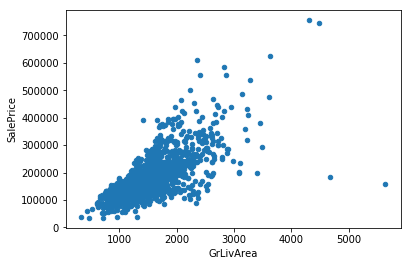

In [10]:
df.plot.scatter('GrLivArea','SalePrice')

In [11]:
df[df.GrLivArea > 4000][sqft_variables]

,MSZoning,BedroomAbvGr,FullBath,SalePrice,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,LotArea,GarageArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
523,RL,3,3,184750,3138,4676,3138,1538,40094,884,...,208,406,0,0,0,0,762.0,2260,0,878
691,RL,4,3,755000,2444,4316,2444,1872,21535,832,...,382,50,0,0,0,0,1170.0,1455,0,989
1182,RL,4,3,745000,2396,4476,2411,2065,15623,813,...,171,78,0,0,0,555,0.0,2096,0,300
1298,RL,3,2,160000,6110,5642,4692,950,63887,1418,...,214,292,0,0,0,480,796.0,5644,0,466


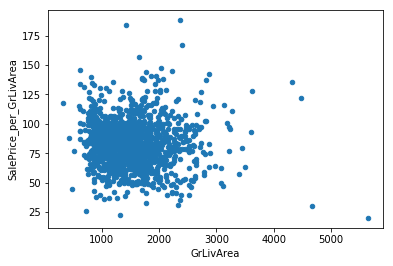

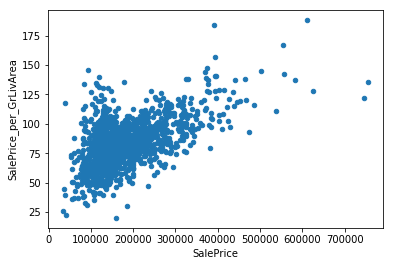

In [12]:
df['GrandSqft'] = (df['GrLivArea'] + df['GarageArea'] + df['WoodDeckSF'] + \
                   df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['PoolArea'])
df['SalePrice_per_GrLivArea'] = df['SalePrice'] / df['GrandSqft']
df.plot.scatter('GrLivArea', 'SalePrice_per_GrLivArea')
df.plot.scatter('SalePrice', 'SalePrice_per_GrLivArea')

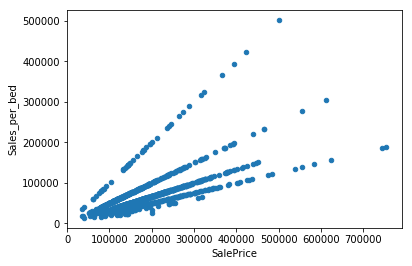

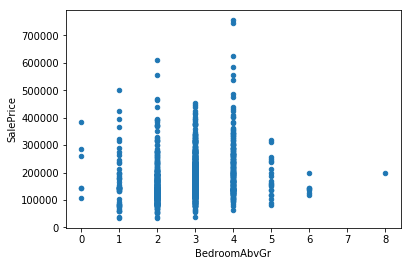

In [13]:
df['Sales_per_bed'] = df.SalePrice / df.BedroomAbvGr
df.plot.scatter('SalePrice','Sales_per_bed' )
df.plot.scatter('BedroomAbvGr', 'SalePrice')

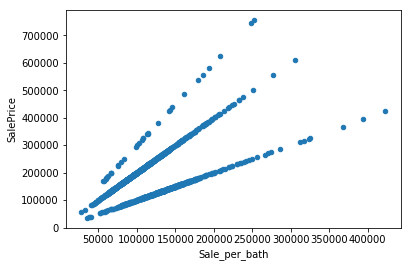

In [14]:
df['Sale_per_bath'] = df.SalePrice / df.FullBath

df.plot.scatter('Sale_per_bath', 'SalePrice')

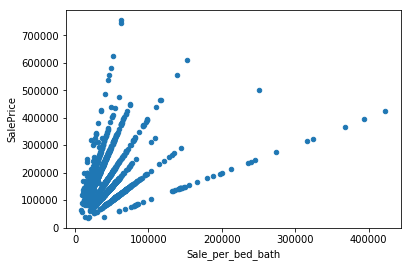

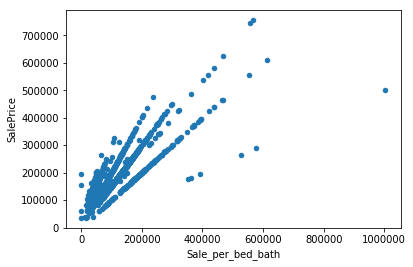

In [15]:
df['Sale_per_bed_bath'] = df.SalePrice / (df.BedroomAbvGr * df.FullBath )
df.plot.scatter('Sale_per_bed_bath', 'SalePrice')

df['Sale_per_bed_bath'] = df.SalePrice / (df.BedroomAbvGr / df.FullBath )
df.plot.scatter('Sale_per_bed_bath', 'SalePrice')

In [16]:
df[df.BedroomAbvGr == 0][['BedroomAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']]

,BedroomAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
53,0,0,1,2,0
189,0,1,1,1,0
634,0,0,0,2,0
1163,0,0,2,2,0
1213,0,0,0,1,1
1270,0,0,1,2,0


In [17]:
df_temp = df.copy()
df_temp.BedroomAbvGr = df_temp.BedroomAbvGr.apply(lambda x : x if x > 0 else 1)
df_temp['sales_per_new'] = df_temp.SalePrice / df_temp.BedroomAbvGr
#df[df.new_variable == np.inf] .new_variable = df[df.new_variable == np.inf].SalePrice

In [18]:
#df['sales_per_new'] = df.SalePrice / df.new_variable
df_temp[df_temp['sales_per_new'] == 0][['BedroomAbvGr','SalePrice','sales_per_new']]

,BedroomAbvGr,SalePrice,sales_per_new


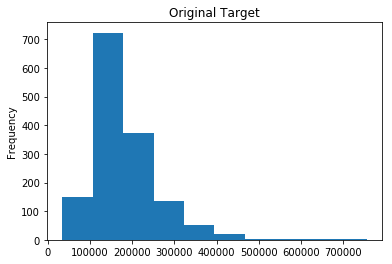

1.8828757597682129 3.8379474549457724


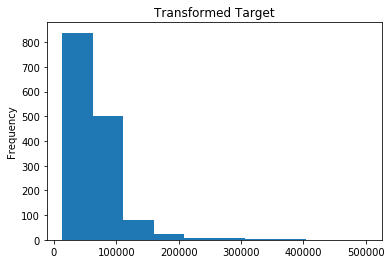

In [19]:
def checkTheTarget(df):
    df.SalePrice.plot('hist',title="Original Target")
    plt.show()
    df.sales_per_new.plot('hist', title="Transformed Target")
    print(df.SalePrice.skew(), df.sales_per_new.skew())
checkTheTarget(df_temp)    

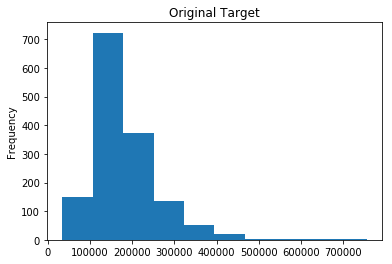

1.8828757597682129 1.026698274503643


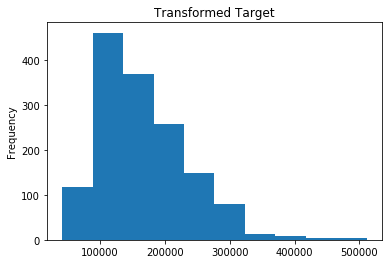

In [20]:
df['new_variable'] = df.BedroomAbvGr * .1 + df.FullBath *.25 + df.HalfBath * .5 + df.BsmtFullBath *.75 + df.BsmtHalfBath * .1
df['sales_per_new'] = df.SalePrice / df.new_variable
checkTheTarget(df) 

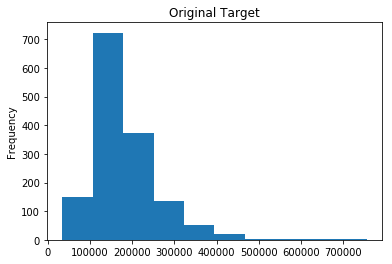

1.8828757597682129 1.0653548216245723


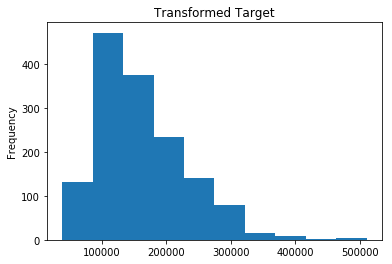

In [21]:
df['new_variable'] = df.BedroomAbvGr * .1 + df.FullBath *.25 + df.HalfBath * .5 + df.BsmtFullBath *.75 + df.BsmtHalfBath * 1
df['sales_per_new'] = df.SalePrice / df.new_variable
checkTheTarget(df) 

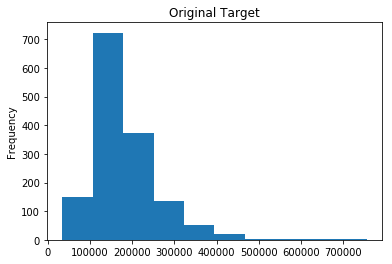

1.8828757597682129 2.0255912816625488


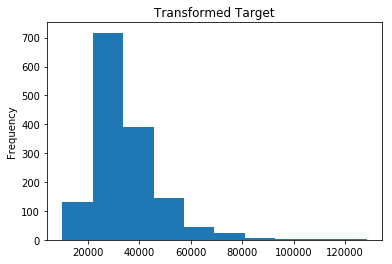

In [22]:
df['new_variable'] = df.BedroomAbvGr  + df.FullBath  + df.HalfBath  + df.BsmtFullBath + df.BsmtHalfBath
df['sales_per_new'] = df.SalePrice / df.new_variable
checkTheTarget(df) 

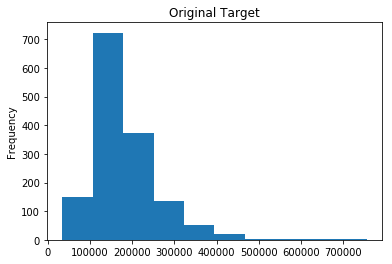

1.8828757597682129 1.1449039665555014


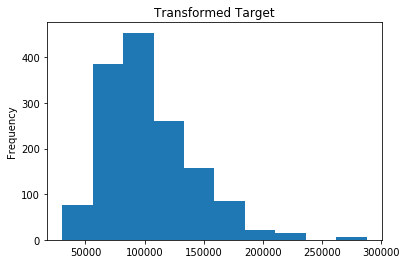

In [23]:
df['new_variable'] = df.BedroomAbvGr *.2 + df.FullBath *.4 + df.HalfBath *.6 + df.BsmtFullBath *.8+ df.BsmtHalfBath *1
df['sales_per_new'] = df.SalePrice / df.new_variable
checkTheTarget(df) 

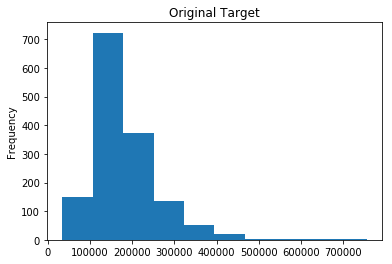

1.8828757597682129 1.1236469332499337


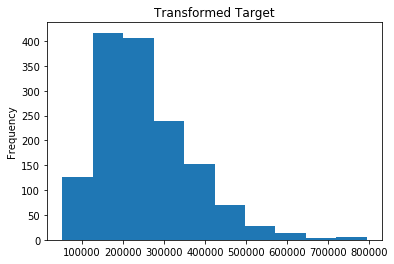

In [24]:
df['new_variable'] = df.BedroomAbvGr *.1 + df.FullBath *.1 + df.HalfBath *.25 + df.BsmtFullBath *.5+ df.BsmtHalfBath *.75
df['sales_per_new'] = df.SalePrice / df.new_variable
checkTheTarget(df) 

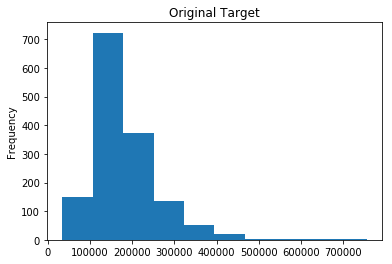

1.8828757597682129 0.12133506220521352


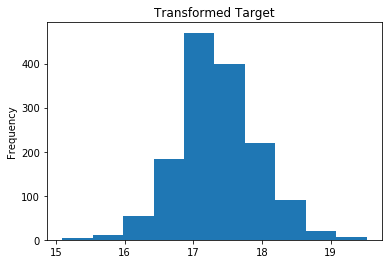

In [25]:
df['sales_per_new'] = np.log2(df.SalePrice )
checkTheTarget(df) 

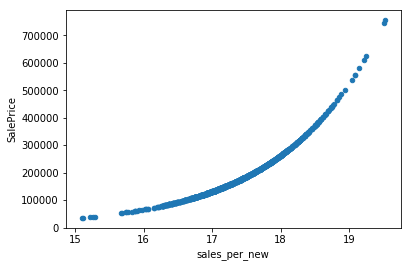

In [26]:
df.plot.scatter('sales_per_new', 'SalePrice')

In [27]:
df[df.BedroomAbvGr == 0][sqft_variables]

,MSZoning,BedroomAbvGr,FullBath,SalePrice,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,LotArea,GarageArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
53,RL,0,0,385000,1842,1842,1842,0,50271,894,...,857,72,0,0,0,0,0.0,1810,0,32
189,RL,0,1,286000,1593,1593,1593,0,4923,682,...,0,120,0,0,224,0,0.0,1153,0,440
634,RL,0,0,144000,1056,1056,1056,0,6979,576,...,264,56,0,0,0,0,0.0,1056,0,0
1163,RL,0,0,108959,1198,1258,1258,0,12900,400,...,120,0,0,0,0,0,0.0,1198,0,0
1213,RL,0,0,145000,648,960,960,0,10246,364,...,88,0,0,0,0,0,0.0,648,0,0
1270,RL,0,0,260000,1332,1524,1332,192,23595,586,...,268,0,0,0,0,0,0.0,1258,0,74


In [28]:
df[df.Sale_per_bed_bath == np.inf]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,GrandSqft,SalePrice_per_GrLivArea,Sales_per_bed,Sale_per_bath,Sale_per_bed_bath,new_variable,sales_per_new
189,190,120,RL,41.0,4923,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,286000,2619,109.201985,inf,286000.0,inf,0.85,18.125656


for c in df.select_dtypes(include=np.number):
    df[[c,'sales_per_new']].groupby(by=c).agg('mean').reset_index().plot(c,'sales_per_new')
    plt.show()
    df[[c,'SalePrice']].groupby(by=c).agg('mean').reset_index().plot(c,'SalePrice')
    plt.show()

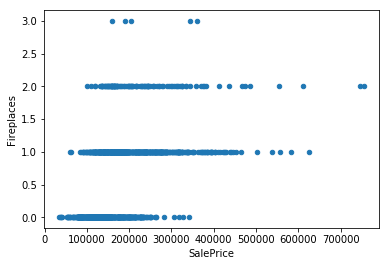

In [29]:
df.plot.scatter('SalePrice', 'Fireplaces')

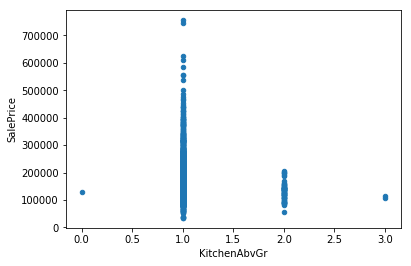

In [30]:
df.plot.scatter('KitchenAbvGr','SalePrice')

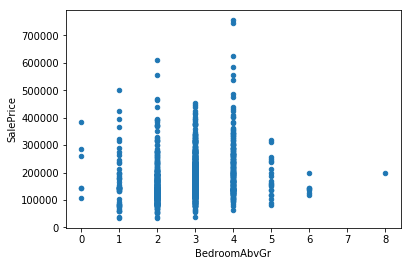

In [31]:
df.plot.scatter('BedroomAbvGr','SalePrice')


In [32]:
print("Skewness Before : ", df.SalePrice.skew(), "Skewness After : ",df.sales_per_new.skew())

Skewness Before :  1.8828757597682129 Skewness After :  0.12133506220521352


##### It appears that our transformation have not only made the target variable less skewed but also did not impact other variables for the dataset.

##### Now let us try this transformation with XGBoost !!!!